# **결과**

## preprocssing0 + CNN_BiLSTM -> 제출 시: 0.50141 / - loss: 0.6147 - accuracy: 0.8757 

## **모델링(전처리0+Bert 임베딩+CNN_BiLSTM)**

In [ ]:
#훈련 데이터 셋과 검증 데이터 셋으로 분리
from sklearn.model_selection import train_test_split
TEST_SIZE=0.2
RANDOM_SEED=42

train_xx, eval_x, train_y, eval_y=train_test_split(train_x, train['label'], test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)

eval_y = to_categorical(eval_y)


In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout,Conv1D, GlobalMaxPooling1D, MaxPooling1D, SpatialDropout1D

#CNN_BiLSTM_preprocessing0
model = tf.keras.Sequential([
    Embedding(len(tokenizer.vocab)+1, 100, input_length = MAX_SEQ_LEN),
    Bidirectional(LSTM(128, return_sequences=True)),
    Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.25),
    # Bidirectional(LSTM(100), return_sequences=True),
    Dense(128, activation='relu'),
    Dense(46, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 75, 100)           3052300   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 256)           234496    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 75, 128)           163968    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 46)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=2, mode='min')

In [ ]:
history = model.fit(train_xx, train_y, validation_split=0.2, epochs=20, batch_size=128 ,callbacks = [es])

Epoch 1/20
872/872 [==============================] - 671s 764ms/step - loss: 1.0689 - accuracy: 0.8170 - val_loss: 0.9512 - val_accuracy: 0.8248
Epoch 2/20
872/872 [==============================] - 668s 766ms/step - loss: 0.9129 - accuracy: 0.8241 - val_loss: 0.8367 - val_accuracy: 0.8314
Epoch 3/20
872/872 [==============================] - 664s 762ms/step - loss: 0.8144 - accuracy: 0.8312 - val_loss: 0.7628 - val_accuracy: 0.8398
Epoch 4/20
872/872 [==============================] - 663s 760ms/step - loss: 0.7471 - accuracy: 0.8370 - val_loss: 0.7202 - val_accuracy: 0.8434
Epoch 5/20
872/872 [==============================] - 664s 761ms/step - loss: 0.6987 - accuracy: 0.8431 - val_loss: 0.6767 - val_accuracy: 0.8502
Epoch 6/20
872/872 [==============================] - 662s 759ms/step - loss: 0.6593 - accuracy: 0.8476 - val_loss: 0.6535 - val_accuracy: 0.8559
Epoch 7/20
872/872 [==============================] - 660s 757ms/step - loss: 0.6267 - accuracy: 0.8532 - val_loss: 0.6339 -

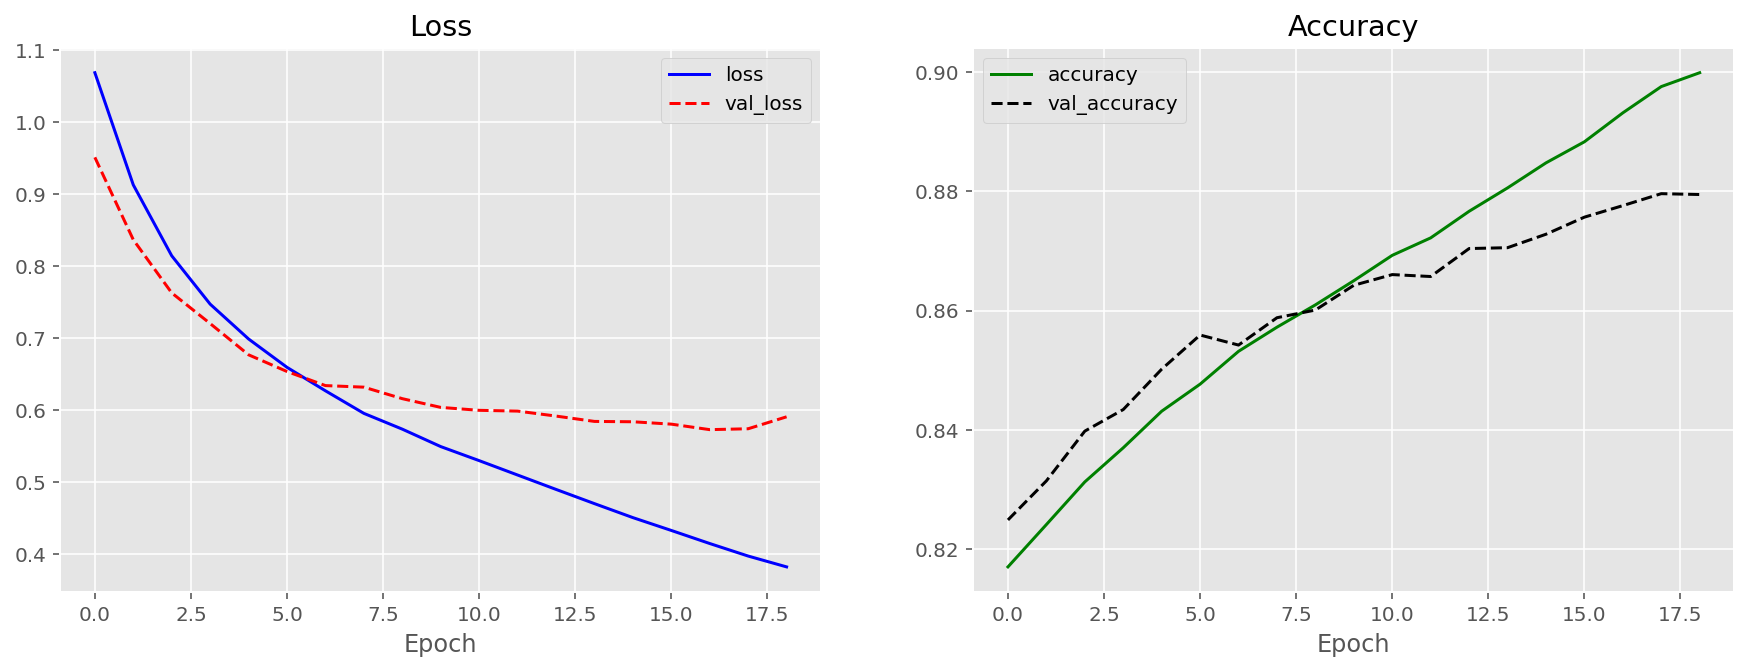

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title('BiLSTM_CNN')

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import log_loss, accuracy_score,f1_score,roc_auc_score
loss, accuracy = model.evaluate(eval_x, eval_y)

1090/1090 [==============================] - 48s 44ms/step - loss: 0.6147 - accuracy: 0.8757


In [ ]:
k1=[0]*len(eval_x)
for i in range(len(eval_x)):
  k1[i]=eval_x[i].argmax()

In [ ]:
k2=[0]*len(eval_y)
for i in range(len(eval_y)):
  k2[i]=eval_y[i].argmax()

In [ ]:
print(accuracy)
# eval_y와 model.predict(eval_x)는 현재 크기가 다르다.
#print(f1_score(k1,k2))

0.8757350444793701


ValueError: ignored

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/dacon 기후기술분류 ai 데이터/sample_submission.csv")

In [ ]:
print(len(test_x))
print(len(sample_submission))

43576
43576


In [ ]:
k=model.predict(test_x)
k

array([[9.8800117e-01, 3.6717387e-07, 3.5078037e-07, ..., 1.1443587e-05,
        5.0182530e-10, 7.9420106e-06],
       [9.9973136e-01, 5.8337606e-09, 6.9475015e-10, ..., 6.4091861e-09,
        3.8996578e-13, 1.8454278e-04],
       [9.8917937e-01, 7.5929449e-08, 3.7841641e-09, ..., 2.0608363e-08,
        2.6676130e-11, 3.1632610e-04],
       ...,
       [2.8031184e-06, 9.1018116e-08, 9.9972397e-01, ..., 1.4282485e-09,
        9.0257307e-15, 3.2885836e-11],
       [9.8002166e-01, 4.3460973e-06, 2.6472457e-05, ..., 2.4278655e-04,
        5.9144953e-05, 3.2778698e-04],
       [1.8126157e-01, 3.4859163e-08, 5.8064827e-05, ..., 1.4122534e-06,
        3.5329926e-08, 1.2595851e-05]], dtype=float32)

In [ ]:
k3=[0]*(len(k))
for i in range(len(k)):
  k3[i]=k[i].argmax()

In [ ]:
k3

[0,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 27,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 0,
 0,
 0,
 29,
 0,
 0,
 0,
 0,
 5,
 14,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 31,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 43,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45,
 0,
 0,
 30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 38,
 0,
 31,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 19,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 25,
 45,
 0,
 0,
 0,
 28,
 0,
 0,

In [ ]:
sample_submission['label']=k3
sample_submission

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0
...,...,...
43571,217875,0
43572,217876,0
43573,217877,2
43574,217878,0


In [ ]:
sample_submission.to_csv('/content/CNN_BiLSTM_preprocessing0.csv', index=False)

In [ ]:
model.save('/content/drive/MyDrive/dacon 기후기술분류 ai 데이터/BiLSTM_CNN_prepro0.h5')